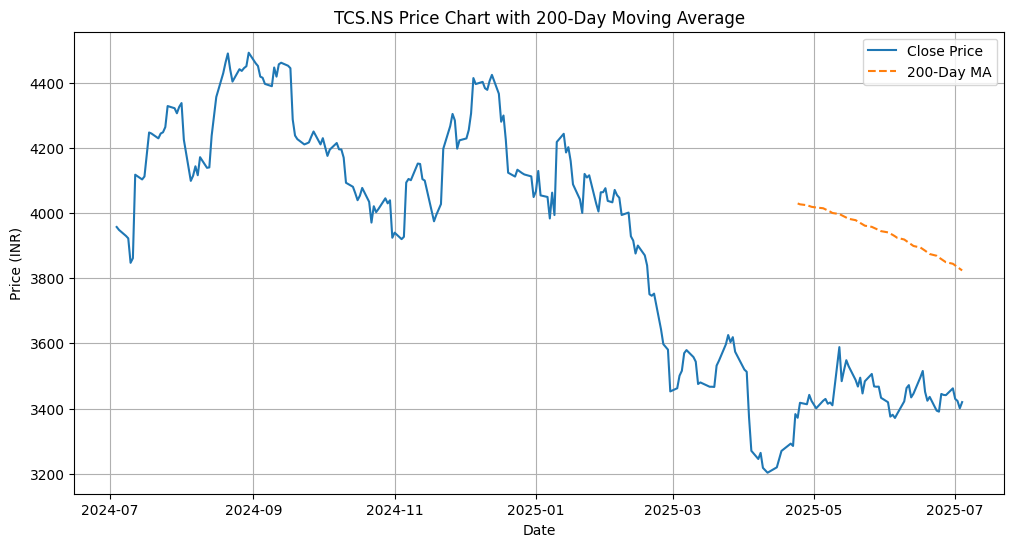

/tmp/ipython-input-8-3021335326.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_data = pd.concat([summary_data, new_row], ignore_index=True)


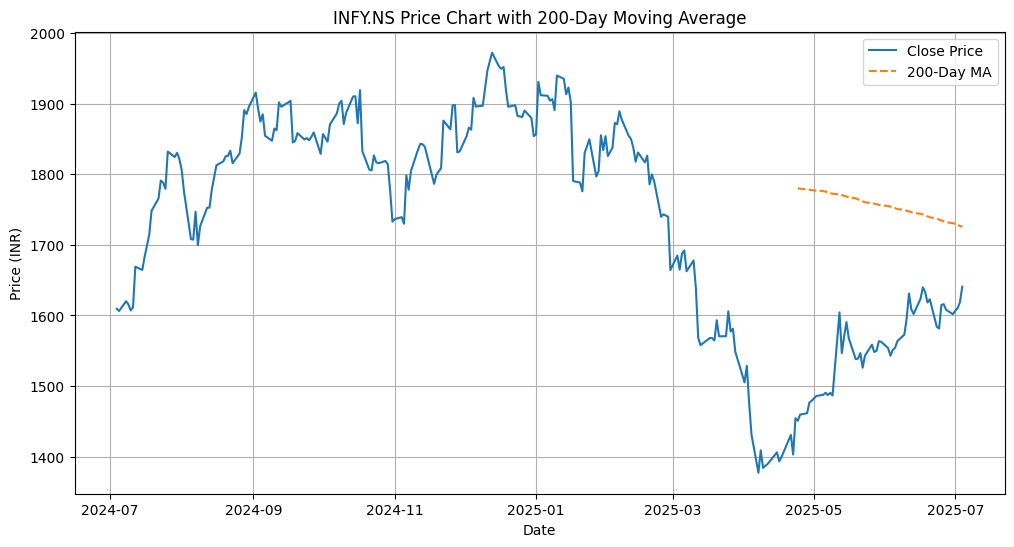

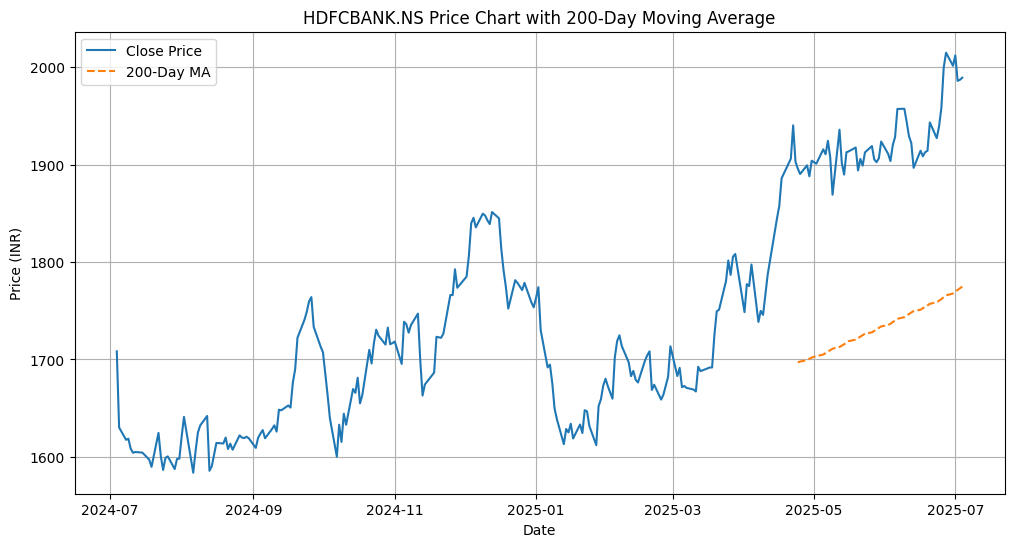


📊 Portfolio Summary:
         Stock  Average Return (%)  Volatility (%)
0       TCS.NS               -0.05            1.37
1      INFY.NS                0.02            1.60
2  HDFCBANK.NS                0.07            1.20

✅ All stock data and summary exported successfully. You can now open them in Excel.


In [8]:
# Day 4: Portfolio Dashboard with 200-Day Moving Average

# Install yfinance (only needed in Colab)
!pip install yfinance

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define your stock portfolio (add more if needed)
portfolio = ["TCS.NS", "INFY.NS", "HDFCBANK.NS"]

# Create empty summary DataFrame
summary_data = pd.DataFrame(columns=["Stock", "Average Return (%)", "Volatility (%)"])

# Loop through each stock
for ticker in portfolio:
    stock = yf.Ticker(ticker)
    data = stock.history(period="1y")  # 1 year daily data

    # Calculate 200-Day Moving Average
    data["200_MA"] = data["Close"].rolling(window=200).mean()

    # Calculate Daily Returns
    data["Daily Return"] = data["Close"].pct_change()

    # Plot: Closing Price + 200-Day MA
    plt.figure(figsize=(12, 6))
    plt.plot(data["Close"], label="Close Price")
    plt.plot(data["200_MA"], label="200-Day MA", linestyle="--")
    plt.title(f"{ticker} Price Chart with 200-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate statistics
    avg_return = data["Daily Return"].mean() * 100
    volatility = data["Daily Return"].std() * 100

    # Add row to summary table
    new_row = pd.DataFrame([{
        "Stock": ticker,
        "Average Return (%)": round(avg_return, 2),
        "Volatility (%)": round(volatility, 2)
    }])

    summary_data = pd.concat([summary_data, new_row], ignore_index=True)

    # Export each stock's data to CSV
    filename = ticker.replace(".NS", "") + "_dashboard_data.csv"
    data.to_csv(filename)

# Show final summary
print("\n📊 Portfolio Summary:")
print(summary_data)

# Export summary table
summary_data.to_csv("Portfolio_Summary.csv", index=False)
print("\n✅ All stock data and summary exported successfully. You can now open them in Excel.")